#### Описание проекта

##### Задачи проекта

Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

##### Описание данных

###### Данные для первой части

Файл `/datasets/hypothesis.csv`

`Hypothesis` — краткое описание гипотезы

`Reach` — охват пользователей по 10-балльной шкале

`Impact` — влияние на пользователей по 10-балльной шкале

`Confidence` — уверенность в гипотезе по 10-балльной шкале

`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

###### Данные для второй части

*Файл `/datasets/orders.csv`*


`transactionId` — идентификатор заказа

`visitorId` — идентификатор пользователя, совершившего заказ

`date` — дата, когда был совершён заказ

`revenue` — выручка заказа

`group` — группа A/B-теста, в которую попал заказ

*Файл `/datasets/visitors.csv`*


`date` — дата

`group` — группа A/B-теста

`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

#### План работы

- Предобработка данных


- **Часть 1. Приоритизация гипотез**

    В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort
    
    - Применить фреймворк ICE для приоритизации гипотез. Отсоровать их по убыванию приоритета
    
    - Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета
    
    - Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло
    
    
- **Часть 2. Анализ A/B-теста**

    Проанализировать A/B-тест:
    
    - Постройть график кумулятивной выручки по группам. Сделайть выводы и предположения
    
    - Постройть график кумулятивного среднего чека по группам. Сделайть выводы и предположения
    
    - Постройть график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайть выводы и предположения
    
    - Постройть график кумулятивного среднего количества заказов на посетителя по группам. Сделайть выводы и предположения
    
    - Постройть график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайть выводы и предположения
    
    - Постройть точечный график количества заказов по пользователям. Сделайть выводы и предположения
    
    - Посчитайть 95-й и 99-й перцентили количества заказов на пользователя. Выберать границу для определения аномальных пользователей
    
    - Постройть точечный график стоимостей заказов. Сделайть выводы и предположения
    
    - Посчитайть 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов
    
    - Посчитайть статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения
    
    - Посчитайть статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения
    
    - Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения
    
    - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
    
    - Принять решение по результатам теста и объясните его. Варианты решений:
    
        1. Остановить тест, зафиксировать победу одной из групп.
        
        2. Остановить тест, зафиксировать отсутствие различий между группами.
        
        3. Продолжить тест.

#### Предобработка данных

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings

In [2]:
def pre(table):
    for column in table:
        print(f'Процент пропущенных в столбце {column} равно {round(table[column].isna().sum()/len(table[column]), 4)*100}%')
    print(f'Количество дубликатов в таблице равно {table.duplicated().sum()}')

##### Данные для первой части

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [4]:
pre(hypothesis)
pd.options.display.max_colwidth = 150
hypothesis.head()

Процент пропущенных в столбце Hypothesis равно 0.0%
Процент пропущенных в столбце Reach равно 0.0%
Процент пропущенных в столбце Impact равно 0.0%
Процент пропущенных в столбце Confidence равно 0.0%
Процент пропущенных в столбце Efforts равно 0.0%
Количество дубликатов в таблице равно 0


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


##### Данные для второй части

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
pre(orders)
orders.info()
orders.head()

Процент пропущенных в столбце transactionId равно 0.0%
Процент пропущенных в столбце visitorId равно 0.0%
Процент пропущенных в столбце date равно 0.0%
Процент пропущенных в столбце revenue равно 0.0%
Процент пропущенных в столбце group равно 0.0%
Количество дубликатов в таблице равно 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
visitors = pd.read_csv('/datasets/visitors.csv')
pre(visitors)
visitors.info()
visitors.head()

Процент пропущенных в столбце date равно 0.0%
Процент пропущенных в столбце group равно 0.0%
Процент пропущенных в столбце visitors равно 0.0%
Количество дубликатов в таблице равно 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


*Промежуточный вывод*

Пропусков не обнаружено, названия столбцов заменены

Столбцы date таблиц orders и visitors необходимо привести к соответствующим типам данных

##### Приведение типов данных

In [7]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


*Промежуточный вывод*

Типы данных приведены к корректным

#### Часть 1. Приоритизация гипотез

##### Применение фреймворка ICE

In [8]:
hypothesis['ice'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'], 2) 
hypothesis.sort_values(by='ice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


##### Применение фреймворка RICE

In [9]:
hypothesis['rice'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis.sort_values(by='rice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


*Промежуточный вывод*

Приоритет гипотез при применении способов приоритезации ICE и RICE различается. Изменения во втором случае вносит параметр, оценивающий количество пользователей, затронутых изменением. Первые три места при применении подхода ICE (гипотезы номер 8, 0 и 7) заменились на 7, 2 и 0 при применении подхода RICE

#### Часть 2. Анализ A/B-теста

In [10]:
print(f'В тесте присутствуют группы: {orders["group"].unique()}')
print(f'Дата начала теста: {orders["date"].min()}, дата окончания теста: {orders["date"].max()}')
visitorsA = pd.Series(orders.query('group == "A"')['visitorId'].unique())
visitorsB = pd.Series(orders.query('group == "B"')['visitorId'].unique())
print(f'В группе A: {len(visitorsA)} уникальных пользователей, в группе B {len(visitorsB)} уникальных пользователей')

В тесте присутствуют группы: ['B' 'A']
Дата начала теста: 2019-08-01 00:00:00, дата окончания теста: 2019-08-31 00:00:00
В группе A: 503 уникальных пользователей, в группе B 586 уникальных пользователей


*Промежуточный вывод*

В тесте участвуют две группы, тест длится 30 дней. В группе B на 83 пользователя больше, чем в группе A. Нужно проверить, нет ли в данных пользователей, участвовавших в нескольких группах теста одновременно

In [11]:
allVisitors = pd.concat([visitorsA, visitorsB])
print(f'В двух группах {allVisitors.duplicated().sum()} пользователей, участвовавших в нескольких группах теста одновременно')
visitorsB = visitorsB[visitorsB.isin(visitorsA) == False]
visitorsA = visitorsA[visitorsA.isin(visitorsB) == False]
print(f'В группе A: {len(visitorsA)} уникальных пользователей, в группе B {len(visitorsB)} уникальных пользователей')
allVisitors = pd.concat([visitorsA, visitorsB])
print(f'После удаления дубликатов в двух группах {allVisitors.duplicated().sum()} пользователей, участвовавших в нескольких группах теста одновременно')

В двух группах 58 пользователей, участвовавших в нескольких группах теста одновременно
В группе A: 503 уникальных пользователей, в группе B 528 уникальных пользователей
После удаления дубликатов в двух группах 0 пользователей, участвовавших в нескольких группах теста одновременно


Пользователей, присутствующих в двух выборках одновременно, необходимо убрать их рассмотрения, так как эти данные могут сместить метрики

##### Построение графика кумулятивной выручки по группам

*Промежуточный вывод*

Показатели обеих групп улучшаются, однако показатель группы B почти в два раза лучше показателей группы A

In [12]:
datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = (datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <=
x['date'], orders['group'] == x['group'])]
                               .agg({'date' : 'max', 'group' : 'max',
'transactionId': pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}),
axis=1).sort_values(by=['date','group']))
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date']
<= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные
# названия
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'],
right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

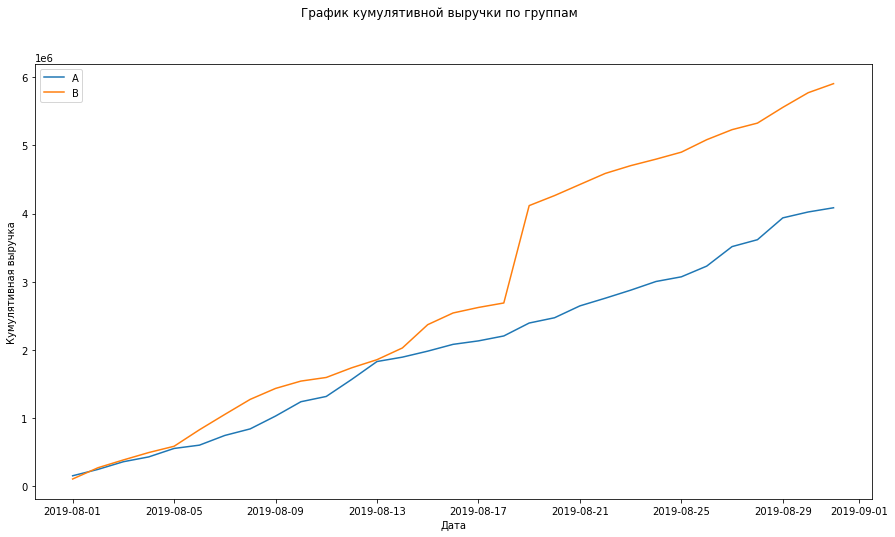

In [13]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.suptitle("График кумулятивной выручки по группам")
plt.gcf().set_size_inches(15, 8)
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
None

*Промежуточный вывод*

Показатели кумулятивной выручки группы B стабильно показывают лучшие результаты относительно группы A, совершая скачок вверх в два раза 2019-08-12, далее показатели улучшаются

##### Построение графика кумулятивного среднего чека по группам

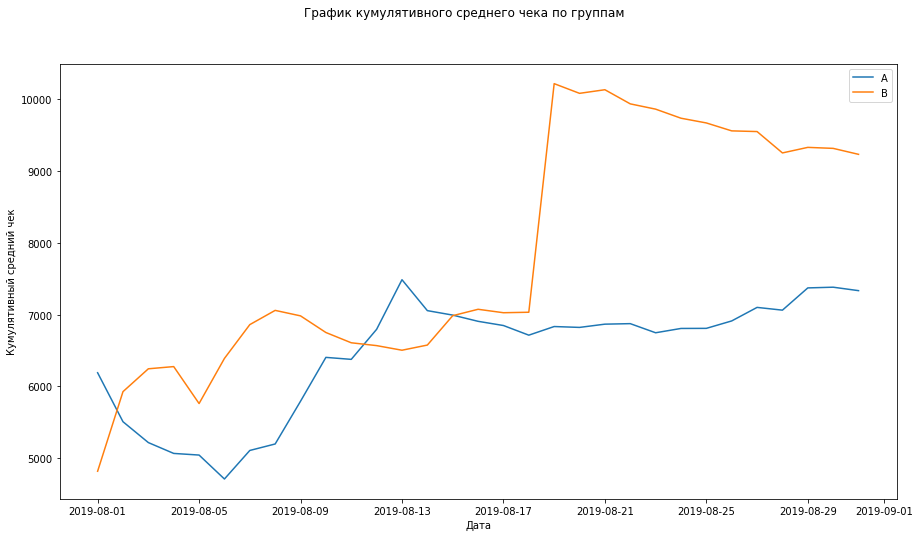

In [14]:
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.gcf().set_size_inches(15, 8)
plt.suptitle("График кумулятивного среднего чека по группам")
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
None

*Промежуточный вывод*


Показатели среднего чека группы B также показывают хорошие результаты, успупая группе A в период с 2019-08-11 по 20019-08-15, совершая скачок вверх на 45% 2019-08-12, далее показатели ухудшаются. Группа B лучше группы A примерно на 40%

Влияние на показатели группы B оказал крупный заказ, оформленный 2019-08-12

##### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

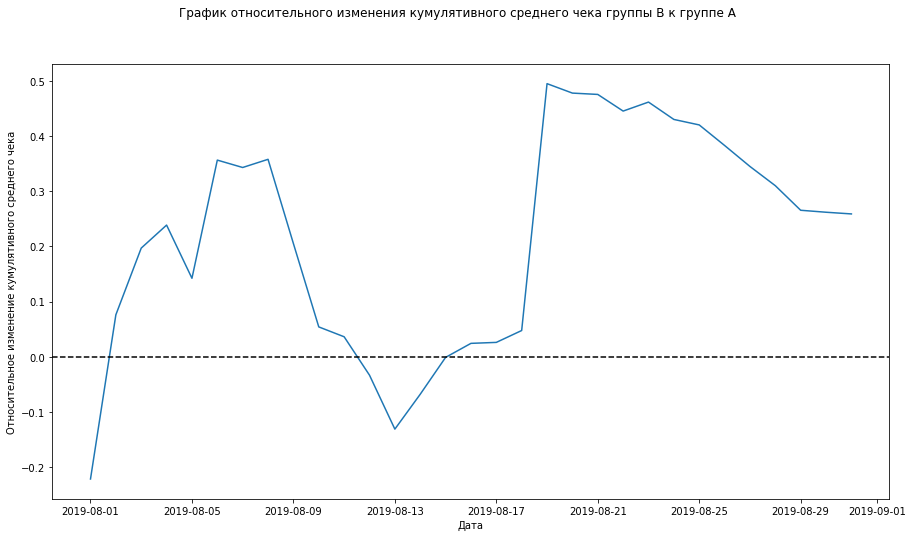

In [15]:
# собираем данные в одном датафрейме
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date',
right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.suptitle("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.gcf().set_size_inches(15, 8)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кумулятивного среднего чека')
None

*Промежуточный вывод*

Относительные показатели группы B показывают низкие значения с 2019-08-10 по 2019-08-2019, улучшаются в пять раз 2019-08-19, далее ухудшаются на 40% к 2019-08-31

##### Построение графика кумулятивного среднего количества заказов на посетителя по группам

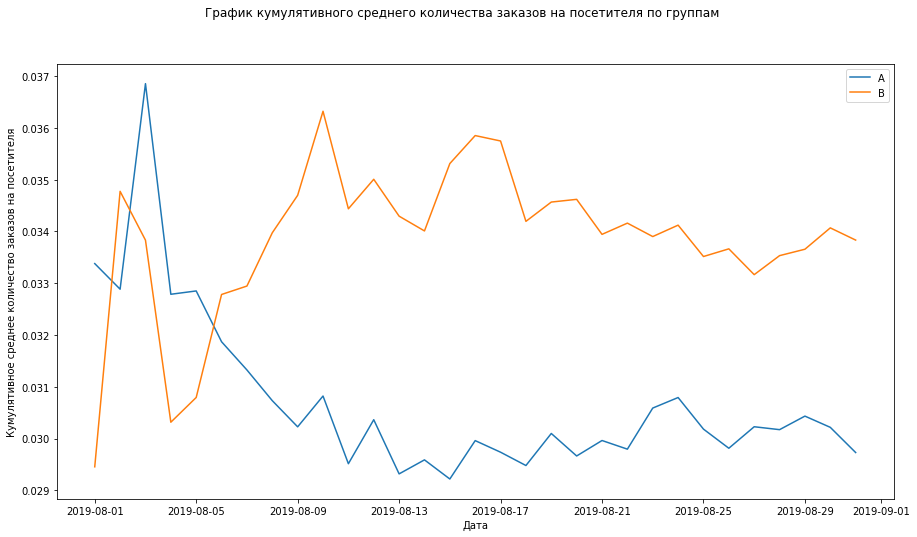

In [16]:
cummulativeOrdersA = cummulativeData[cummulativeData['group']=='A'][['date','orders', 'visitors']]
cummulativeOrdersB = cummulativeData[cummulativeData['group']=='B'][['date','orders', 'visitors']]
cummulativeOrdersA['ratio'] = cummulativeOrdersA['orders'] / cummulativeOrdersA['visitors']
cummulativeOrdersB['ratio'] = cummulativeOrdersB['orders'] / cummulativeOrdersB['visitors']
plt.plot(cummulativeOrdersA['date'], cummulativeOrdersA['ratio'], label='A')
plt.plot(cummulativeOrdersB['date'], cummulativeOrdersB['ratio'], label='B')
plt.gcf().set_size_inches(15, 8)
plt.suptitle("График кумулятивного среднего количества заказов на посетителя по группам")
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')
None

*Промежуточный вывод*

Показатели кумулятивного среднего количества заказов на посетителя группы B стабильно лучше показателей группы A на 15%

##### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

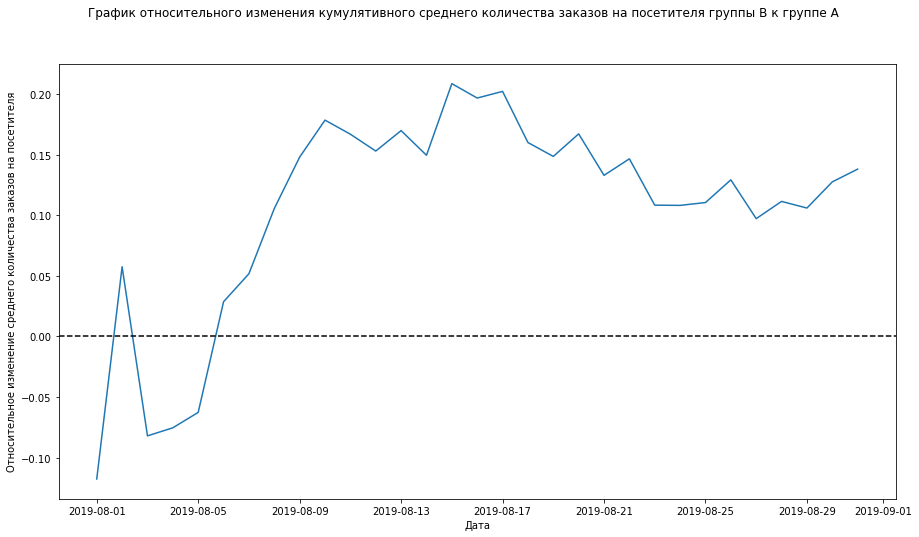

In [17]:
# собираем данные в одном датафрейме
mergedCummulativeOrders = cummulativeOrdersA.merge(cummulativeOrdersB, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCummulativeOrders['date'], (mergedCummulativeOrders['ordersB']/mergedCummulativeOrders['visitorsB'])/(mergedCummulativeOrders['ordersA']/mergedCummulativeOrders['visitorsA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.suptitle("График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.gcf().set_size_inches(15, 8)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего количества заказов на посетителя')
None

*Промежуточный вывод*

Показатели относительного изменения кумулятивного среднего количества заказов на посетителя группы B стабильно лучше показателей группы A примерно на 15%

##### Построение точечного графика количества заказов по пользователям

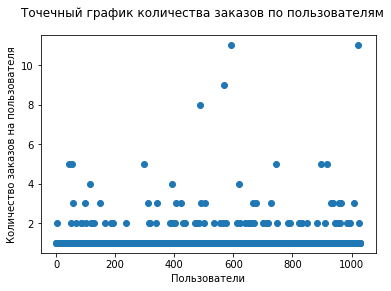

In [18]:
ordersByVisitors = (orders.groupby('visitorId', as_index=False)
                         .agg({'transactionId' : 'nunique'}))
x_values = pd.Series(range(0, len(ordersByVisitors)))
ordersByVisitors.columns = ['visitorId', 'orders']
plt.scatter(x=x_values, y=ordersByVisitors['orders'])
plt.suptitle("Точечный график количества заказов по пользователям")
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов на пользователя')
None

*Промежуточный вывод*

Пользователи редко совершают заказы более четырёх раз

##### Подсчёт 95-й и 99-й перцентили количества заказов на пользователя. Определение границы для определения аномальных пользователей

In [19]:
percentile1 = 95
percentile2 = 99
np.percentile(ordersByVisitors['orders'], [percentile1, percentile2])

array([2., 4.])

*Промежуточный вывод*

Не более 5% покупателей совершает более двух заказов и не более 1% пользователей - более четырёх

За аномальных приму покупателей, совершивших более двух заказов

##### Построение точечного графика стоимостей заказов

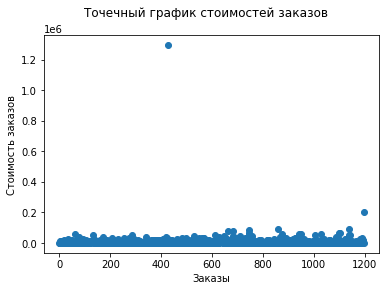

In [20]:
x_values = pd.Series(range(0, len(orders)))
plt.scatter(x=x_values, y=orders['revenue'])
plt.suptitle("Точечный график стоимостей заказов")
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
None

*Промежуточный вывод*

Пользователи обычно не соверщают заказов дороже 28 тыс. д.е.

##### Подсчёт 95-й и 99-й перцентили стоимости заказов. Определение границы для определения аномальных заказов

In [21]:
np.percentile(orders['revenue'], [percentile1, percentile2])

array([28000. , 58233.2])

*Промежуточный вывод*

Не более 5% покупателей совершает покупки дороже 28000 д.е. и не более 1% покупателей - дороже 58233 д.е.

За аномальные приму покупки дороже 28000

##### Подсчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

*Сформулирую гипотезы*

Нулевая: различий в среднем количестве заказов на поситителя между группами нет. Альтернативная: различия в среднем количестве заказов на поситителя между группами есть

Я проверяю гипотезы с помощью проведения непараметрического теста Уилкоксона-Манна-Уитни. Этот метод выбран исходя из того, что в ванных могут быть выбросы, которые могут существенно повлиять на результат

In [22]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsersB.columns = ['visitorId', 'orders']

visitorsPerDateA = visitors.query('group == "A"')['visitors']
visitorsPerDateB = visitors.query('group == "B"')['visitors']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(0, index=np.arange(visitorsPerDateA.sum() - len(ordersByUsersA['orders'])),
                  name='orders'
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(0, index=np.arange(visitorsPerDateB.sum() - len(ordersByUsersB['orders'])),
                  name='orders'
        ),
    ],
    axis=0,
)


print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительная разница между сравниваемыми величинами = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительная разница между сравниваемыми величинами = 0.138


*Промежуточный вывод*

P-value значительно меньше 0.05, потому нулевую гипотезу отвергаю. Различия в среднем между группами есть

Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего количества заказов на поситителя группы B к среднему количества заказов на поситителя группы группы A равен 13.8%

##### Посчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

*Сформулирую гипотезы*

Нулевая: различий в среднем чеке заказа между группами нет. Альтернативная: различия в среднем чеке заказа между группами есть

In [23]:
print(
    "p-value = {0:.3f}".format(
        stats.mannwhitneyu(
            orders[orders['group'] == 'A']['revenue'],
            orders[orders['group'] == 'B']['revenue'],
        )[1]
    )
)
print(
    "Относительная разница между сравниваемыми величинами = {0:.3f}".format(
        orders[orders['group'] == 'B']['revenue'].mean()
        / orders[orders['group'] == 'A']['revenue'].mean()
        - 1
    )
)

p-value = 0.729
Относительная разница между сравниваемыми величинами = 0.259


*Промежуточный выводы*

P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Кроме того, относительное различие среднего чека между сегментами 25.9%

##### Посчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

*Сформулирую гипотезы*

Нулевая: различий в среднем количестве заказов на поситителя между группами нет. Альтернативная: различия в среднем количестве заказов на поситителя между группами есть

In [24]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [25]:
print(f'Количество уникальных пользователей в группе A до удаления аномальных значений равно {visitorsA.count()}')
print(f'Количество уникальных пользователей в группе B до удаления аномальных значений равно {visitorsB.count()}')

#в таблицфх visitorsA и visitorsB уже id уникальных пользователей

visitorsAFiltered = visitorsA[visitorsA.isin(abnormalUsers) == False].count()
visitorsBFiltered = visitorsB[visitorsB.isin(abnormalUsers) == False].count()

print(f'Количество аномальных пользователей в группе A равно {visitorsA.count() - visitorsAFiltered}')
print(f'Количество аномальных пользователей в группе B равно {visitorsB.count() - visitorsBFiltered}')

print(f'Относительное изменение количества пользователей группы A равно {round((visitorsAFiltered - visitorsA.count()) / visitorsA.count(), 2)}')
print(f'Относительное изменение количества пользователей группы B равно {round((visitorsBFiltered - visitorsB.count()) / visitorsB.count(), 2)}')

Количество уникальных пользователей в группе A до удаления аномальных значений равно 503
Количество уникальных пользователей в группе B до удаления аномальных значений равно 528
Количество аномальных пользователей в группе A равно 46
Количество аномальных пользователей в группе B равно 28
Относительное изменение количества пользователей группы A равно -0.09
Относительное изменение количества пользователей группы B равно -0.05


In [26]:
sampleAFiltered = pd.concat([ordersByUsersA.query('visitorId not in @abnormalUsers')['orders'], pd.Series(0, index=np.arange(visitorsPerDateA.sum() - len(ordersByUsersA['orders'])), name='orders')])
sampleBFiltered = pd.concat([ordersByUsersB.query('visitorId not in @abnormalUsers')['orders'], pd.Series(0, index=np.arange(visitorsPerDateB.sum() - len(ordersByUsersB['orders'])), name='orders')])

print("p-value = {0:.5f}".format(stats.mannwhitneyu(sampleAFiltered,
                                          sampleBFiltered,)[1]))
print("Относительная разница между сравниваемыми величинами = {0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

p-value = 0.01304
Относительная разница между сравниваемыми величинами = 0.173


*Промежуточный вывод*

После удаления аномальных значений группа A потеряла 9% значений, группа B - 5%

*Промежуточный вывод*

P-value значительно меньше 0.05, потому нулевую гипотезу по-прежнему отвергаю. Различия в среднем между группами есть

Анализ отфильтрованных сообщает, что в среднем количестве заказов на посетителя между группами есть статистически значимые различия. Относительный прирост среднего количества заказов на поситителя группы B к среднему количеству заказов на поситителя группы A равен 17.3%. Группа B значительно лучше группы A

##### Посчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

*Сформулирую гипотезы*

Нулевая: различий в среднем чеке между группами нет. Альтернативная: различия в среднем между группами есть

In [27]:
filteredRevenueA = orders.query('group == "A" and visitorId not in @abnormalUsers')['revenue']
filteredRevenueB = orders.query('group == "B" and visitorId not in @abnormalUsers')['revenue']

print("p-value = {0:.3f}".format(stats.mannwhitneyu(filteredRevenueA,
                                          filteredRevenueB,)[1]))
print("Относительная разница между сравниваемыми величинами = {0:.3f}".format(filteredRevenueB.mean() / filteredRevenueA.mean() - 1))

p-value = 0.738
Относительная разница между сравниваемыми величинами = -0.020


*Промежуточный выводы*

P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами по-прежнему нет. Кроме того, относительное различие среднего чека между сегментами снизилось с 25.9% до 2%, стало меньше шума

##### Принятие решения по результатам теста

- Есть статистически значимое различие в среднем количестве заказов на посетителя между группами по «очищенным» данным и по "сырым данным".

- Нет статистически значимого различия в среднем чеке заказа между группами ни по «сырым», ни по данным после фильтрации аномалий;

- График различия среднего количества заказов на посетителя между группами сообщает, что результаты группы B лучше группы A на примерно 15%.

- График различия среднего чека говорит о том, что результаты группы B лучше группы А примерно на 40%.

*На основании фактов можно сделать вывод: Остановить тест, так как группа B превосходит группу А.*